# Digital Tools and Big Data 

This is an example of how to improve readability of coding components. 

Here we replicate or very first script 

## Library import

This section shows how to import all the libraries needed to plot a geospatial data set using python

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Reading Data

This section shows how to read a dataset using a URL. In this case we get data from [open data barcelona](https://opendata-ajuntament.barcelona.cat/data/dataset/82dc847a-661d-4701-a582-b0c1aba89b2a/resource/feafec8a-b389-42b5-a85d-cf16f3976440)

In [2]:
url = 'https://opendata-ajuntament.barcelona.cat/data/dataset/82dc847a-661d-4701-a582-b0c1aba89b2a/resource/feafec8a-b389-42b5-a85d-cf16f3976440/download'
bcn_stations = pd.read_csv(url)


## Setting up geospatial features

This section shows how to prepare the geospatial data set using geopandas

In [3]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(bcn_stations["LONGITUD"], bcn_stations["LATITUD"])]
bcn_stations_geo = geopandas.GeoDataFrame(bcn_stations, crs=crs, geometry=geometry)

/Users/diego/opt/anaconda3/envs/mact_39/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## Plotting geospatial data

This section shows how we can plot geospatial data using geopandas

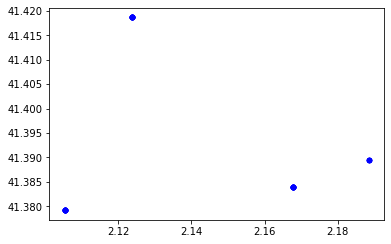

In [4]:
f, ax = plt.subplots()
bcn_stations_geo.plot(ax=ax, marker='o', color='blue', markersize=20)
plt.show()

## Bonus: Additional features

There are additional features that emerge from using a web environment. An example is the web mapping integration summarised in this [blog post](https://carpentries-incubator.github.io/jupyter_maps/aio.html)

In [ ]:
from ipyleaflet import Map
Map()

There are additional configuration alternatives to work with the web mapping tools. We should be aware of the need for extra tools like extensions (in this case JupiterLab)

In [8]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…